In [1]:
# Re-run if you get MathJax gibberish
from assets.specs import startupOption
from assets.pdfshow import pdfshowOption, pdfGet
from assets.startup import initialize
pdfshowOption['mini'] = False
startupOption['debug'] = False
initialize()

<IPython.core.display.Javascript object>

$\newcommand{\mbb}[1]{\mathbb{#1}}
\newcommand{\mrm}[1]{\mathrm{#1}}
\newcommand{\mcal}[1]{\mathcal{#1}}
\newcommand{\tup}[1]{\textup{#1}}
\newcommand{\idty}{\mathds{1}}
%Specials
\newcommand{\hodgedual}{\operatorname{\star}}
\newcommand{\dual}{\ \xlongleftrightarrow{\ \textrm{dual}\ }\ }
\newcommand{\pdd}[1]{\operatorname{\partial_{\mathnormal{#1}}}}
\newcommand{\abs}[1]{\left|#1\right|}
\newcommand{\norm}[1]{\left\|#1\right\|}
\newcommand{\pqty}[1]{\left(#1\right)}
\renewcommand{\idty}{\mathbf{1}}
\newcommand{\dd}[1]{\operatorname{d} #1}
\newcommand{\dv}[2]{\frac{\dd{#1}}{\dd{#2}}}
\newcommand{\pdv}[2]{\frac{\partial{#1}}{\partial{#2}}}
$
        <link rel="stylesheet" type="text/css"
            href="assets/code-prettify/codestyle.css">
        <script type="text/javascript"
            src="assets/code-prettify/google-code-prettify/run_prettify.js">
        </script>
        <style>
            img.inline_img {
                display: unset;
                margin-top: unset;
            }
            .MathJax_Display {
                margin: 6px;
            }
            .dataframe td {
                white-space: nowrap;
            }
        </style>
        <script>
            IPython.OutputArea.prototype._should_scroll = function(lines) {
                return false;
            }
        </script>
        <script src="assets/frame_loaded.js"></script><!--
     --> `< Utilities initialized >`
```python
matplotlib_notebook, display_whitespace, clear_output, InlinePager, show_docstring, get_methods, goodbye```

### GOTO
> 快速跳转至：[**孤立子解的大 $t$ 行为**](#补充：进一步考察解的长期行为)
>
> ** 完整运行这一部分需要大概 `2 min` !  若开启 GIF 渲染，将会更慢！ **<br/>
> ** 若不看前文，直接运行这一部分，需要调用启动脚本；具体参见[这里](#中途启动脚本)。**

### README
> 姓名：Bryan &nbsp;&nbsp; 学号：1500066666
>
> ** 请首先阅读该目录下的 `README.md` 文档！** <br/>
> ** 完整运行本文档 除孤立子解以外的部分 需要大概 `1 min` !  若开启 GIF 渲染，将要 `2 min` ! **<br/>
>
> *测试环境：**IPython 3.6.4 ( > 3.6 REQUIRED! ),** CPU freq ~ 2.70 GHz (max, turbo) x 4 cores, intel, integrated graphics, SSD.*
>
>---
>
> 助教老师好～ 本人不用 `\usepackage` 无法生存 <img class="inline_img" src="https://bryango.github.io/assets/coolemoji/d_erha.png" width="24px" />, 但又难以拒绝 jupyter 的交互式环境，于是捣鼓出了一个解决方案：先用 (Xe) $\mathrm{\LaTeX}$ 编译成 PDF, 再用 [PDF.js](https://github.com/mozilla/pdf.js/) 嵌入到此文档当中。
>
> **若想运行文档中的代码，务必先 `restart & run all` , 然后再刷新一下。**
>
> 相应的实现过程与格式优化置于 `assets/` 目录内，不属于作业的核心内容。若 PDF.js 不能正常调用，可以尝试 mini 模式；只需将上面初始化单元中的 `mini` 选项改为 `True` 即可：
```python
pdfshow_option['mini'] = True
```
此时 PDF 将由浏览器的内置阅读器打开。这样显示的 PDF 将被限制在一定高度的输出框内，无法展开；`exN_mini.html` 即在此模式下生成。
此外，文中的理论分析整合为文档：[`document.pdf`](latex/document.pdf), 便于打印、独立阅读。另有一选项：
```python
startupOption['debug'] = True
```
将启用 `%autoreload 2` 功能，即在运行时动态重载外部模块，以随时反映其变动。
>
> ----------------
> 另外，本次作业中的部分代码与作业核心内容关系紧密，但终究不是重点；这些代码要么来源于前面的作业、要么是函数作图命令（`matplotlib` 的一些操作）等等。它们往往冗长而无趣，故隐于 module 当中；它们位于目录 `pycode/` 之下。
>
> 核心代码均显示在了文档当中，但实际也多是自成 module, 通过 pager `some_function??` 显示；这里采用了[一个 hack](http://nbviewer.jupyter.org/gist/minrk/7715212), 使 pager 显示在行内。如果觉得太长碍事，只需将 `some_function??` 注释掉即可。在前面的初始化单元之 `assets.startup` 中，已通过命令：
```python
sys.path.append('pycode')
```
将引用目录加入到了 `sys.path` 当中，因此下文中的引用并未出现 `pycode` 前缀。初始化选项置于 `assets.specs` 中，通过 magic `%run` 直接在本文档 namespace 中运行。
>
> ----------------
> 此外，本人刚入门 python, js 和 css 也是现学的，上述系统（以及下面的作业）显然还有许多 bug, 如使用 PDF.js 时无法导出 html 文档（因违背浏览器安全策略——不允许 js 访问 `file://` 协议）；此处只得暂时搁置，由此造成的麻烦，本人深表歉意...
>
> 万分感谢～

In [2]:
pdfGet('latex/sections/0.title.pdf').show()

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML, Markdown, Image

# LaTeX off for better performance
tex_status = False
plt.rc('text', usetex=tex_status)
plt.rc('text.latex', unicode=tex_status)
pager = InlinePager()

> **PDE 求解说明：为提高性能，默认关闭 LaTeX 渲染和 csv 输出，除图片以外的一切数据均暂存于内存（RAM）当中；若运行环境内存有限，或有意查看原始数据，则可开启 csv 输出、csv 作图选项，例如：**
```python
# Memory-saving initialization:
some_pde_problem = PDEProblem(..., memory_saving=True)
# Force csv output:
some_pde_problem.solve_with_settings(..., output_enabled=True)
```
此外，默认关闭实时 GIF 渲染（采用缓存图像）：

In [4]:
# real-time GIF generation
gif_gen_advection = False
gif_gen_soliton = False

## 1. 一阶对流方程的迎风格式

采用迎风格式求解一阶对流方程，风速：
$$ a = a(x,t) $$
可以是 $x,t$ 的函数，但对于给定时刻 $t$, 要求 *风向* 不随 $x$ 改变（即应当有 $a(x, t_0)$ 不变号，$\forall x$），否则迎风格式失效。初始化参数如下：

In [5]:
from toolkit.pde import Advection1D
show_docstring(Advection1D)

***Docstring: ***

```python
    """ PDE: 1D advecture, equation:
            (D_t + a(x, t) * D_x) [u(x, t)] = 0;
        the equation is rather trivial, while the initial input is not.

    Args:

        velocity_function: function of t, x,
            the velocity of propagation, namely a(x, t)

            DEFAULT PARAMETER(S) EXPECTED!
                Namely, always use KEYWORD ARGUMENTS
                ... for `velocity_function()`.
                NOTE: Upwind direction is fixed by a(x0, t0).

        initial_distributions: wrapped in a parent function,
            with possible parameters; for example:

                def initial_distributions(params=1.):
                    return lambda x: some_expression_of(x)
                    # ... rely on params=1.

            DEFAULT PARAMETER(S) EXPECTED!
                Namely, always use KEYWORD ARGUMENTS
                ... for `initial_distributions()`.

        supp_domain: interval (start, end),
            NON-ZERO x-region of `initial_distributions`,
            data beyond this region is assumed to be ZERO.
            NOTE: 'supp' is short for 'support'.

        boundary: (function_of_t, function_of_t),
            ONLY accepts FIXED boundary (Dirichlet, or 1st type);
            if None then ASSUME ZERO for _upstream_ boundary.

    NOTE: `initial_distributions`, `supp_domain`, `boundary`
        can be set when initialized,
        OR set later by `set_whatever()` methods.
    """
```

算法的关键在于顺风迭代：

In [6]:
Advection1D._u_generator_upwind??

    def _u_generator_upwind(self, old_u, i, a_value, coeff):
        """ Returns upwind result """
        u = old_u
        if a_value > 0:
            if i == 0:
                raise IndexError('left boundary encountered!')
            return u[i] - coeff * (u[i] - u[i - 1])
        else:
            return u[i] - coeff * (u[i + 1] - u[i])


其中 `coeff` $= \frac{a \Delta t}{\Delta x}$. 也就是说，上风口处的边界条件必须确定，而下风口处的边界条件无关紧要；这与物理直观是吻合的。事实上，对流方程可以延拓在 $\pqty{-\infty, +\infty}$ 上求解，此时再将解限定在一个区间内，则所谓“边界条件”实际上是上风处区间外飘来的初始扰动。完整的求解过程实现如下：

In [7]:
Advection1D.pde_solve_upwind??

    def pde_solve_upwind(self,
                         dt: float, dx: float,
                         t_end: float, t0=0.,
                         output=None, plot=None,
                         plot_t_samplesize=50,
                         **kwargs) -> list:
        """ Solve using upwind scheme.

        Args:

            output: write to specified csv file path in real time,
                SLOW but memory-saving;

            plot: generate plot & save to designated path (directory);

            **kwargs: extra parameters for initial distributions,
                namely `initial_distributions(**kwargs)`;

        Returns:
            ( x_grid,
              ( (t, u_values) for t in t_grid )
            ), if output is set then returns None.

            NOTE:
                1st component: shape ( len(x_grid), );
                2nd component: shape ( len(t_grid), len(x_grid) + 1 );
        """

        if (t_end < t0) or (dt < 0):
            # Time reversal (dt < 0) not su

其中，`grid_generator` 产生包含端点的等间距格点，在 `toolkit.generic` 中定义。

为了便于测试代码，内置了画图和导出数据的语句；事实上，内置的 `output` 和 `plot` 选项主要用于调试，效率不高，下面呈现时并未采用。这些代码导致上述 method 有些冗长，其实，求解的核心代码均在：
```python
try:
    # ... (code) ...
except IndexError:
    # ... (code) ...
```
这一语句当中，为便于阅读，节选如下：

In [8]:
pager.extract('Advection1D.pde_solve_upwind', tag='core')

```
*** Excerpt, tag: <core> ```

            # <core>
            j = 0
            t = t0
            while t_end - t > 1e-16:
                # Always reach endpoint
                dt = min(dt, t_end - t)
                t += dt
                j += 1
                if output_enabled:
                    old_u = t_sections[-1][1:]
                    new_sect = np.empty(x_len + 1)
                else:
                    old_u = t_sections[j - 1][1:]
                    new_sect = t_sections[j]

                new_sect[0] = t
                new_u = new_sect[1:]

                for i, x in enumerate(x_grid):
                    a_value = self.a_func(x, t)
                    coeff = a_value * dt / dx

                    # Take care of boundaries first
                    if i in {0, x_len - 1}:
                        if self.boundary is not None:
                            boundary_index = 0 if i == 0 else 1
                            new_u[i] = self.boundary[boundary_index](t)
                        else:

```
*** Excerpt, tag: <core> ```

初始方波注入，建立方程：

In [9]:
from upwind_stability import UpwindTest
upwind_test = UpwindTest(working_dir='csv/')
upwind_test.__init__??

Source:   
    def __init__(self, working_dir='csv/', memory_saving=False):
        super().__init__(
            working_dir=working_dir,
            memory_saving=memory_saving
        )

        self.problem = Advection1D(
            velocity_function=lambda x=0., t=0.: -1.,
            initial_distributions=square_input,
            supp_domain=(-10., 0.)
        )
        self.params = {
            'dt': .02,
            'dx': .05,
            't_end': 10.
        }  # Default params
        self._pathname_builder()


取默认参数，求解如下：

In [10]:
upwind_test.solve_with_settings(dt=.02, dx=.05)
upwind_test.visualize(gif_gen=gif_gen_advection)

`gif_gen` is off; using archived GIF. 


$\Delta t = 0.02,\ \Delta x = 0.05,\ $

![](csv/figs/advection_dt2_dx5.gif)

可见，峰值匀速（$a = -1$）移动，与我们所期待的一致；然而，峰存在显著的衰减。增大 $\Delta t$, 

In [11]:
upwind_test.solve_with_settings(dt=.04, dx=.05)
upwind_test.visualize(gif_gen=gif_gen_advection)

`gif_gen` is off; using archived GIF. 


$\Delta t = 0.04,\ \Delta x = 0.05,\ $

![](csv/figs/advection_dt4_dx5.gif)

同样存在衰减行为，但 $\Delta t = 0.04$ 时的衰减程度不如 $\Delta t = 0.02$ 时那么显著，可见峰值的衰减是算法造成损失的，并非真实的行为。事实上，对于非色散的 $a = -1.0$, 峰的形态不应当发生变化。进一步增大 $\Delta t$, 

In [12]:
upwind_test.solve_with_settings(dt=.05, dx=.05)
upwind_test.visualize(gif_gen=gif_gen_advection)

`gif_gen` is off; using archived GIF. 


$\Delta t = 0.05,\ \Delta x = 0.05,\ $

![](csv/figs/advection_dt5_dx5.gif)

恰取到临界参数 $\frac{a\Delta t}{\Delta x}$, 此时峰值得到完美保持，这也可以从数据上直接看出：

In [13]:
print(upwind_test.params)
upwind_test.master_df.iloc[-10].iloc[0:12]

{'dt': 0.05, 'dx': 0.05, 't_end': 10.0}


x
t        9.55
-10.0    0.00
-9.95    0.00
-9.9     0.00
-9.85    1.00
-9.8     1.00
-9.75    1.00
-9.7     1.00
-9.65    1.00
-9.6     1.00
-9.55    1.00
-9.5     0.00
Name: 191, dtype: float64

由此可见，$\Delta t$ 并非越小越好，而是应当与 $\Delta x$ 匹配；也不是越大越好，否则将突破稳定性约束，得到数值不稳定的格式；示意如下：

In [14]:
upwind_test.solve_with_settings(dt=.06, dx=.05)
upwind_test.visualize(gif_gen=gif_gen_advection)

`gif_gen` is off; using archived GIF. 


$\Delta t = 0.06,\ \Delta x = 0.05,\ $

![](csv/figs/advection_dt6_dx5.gif)

此时 $\frac{a \Delta t}{\Delta x} > 1$, 数值解在相邻格点之间大尺度振荡：

In [15]:
print(upwind_test.params)
upwind_test.master_df.iloc[-1].iloc[24:36]

{'dt': 0.06, 'dx': 0.05, 't_end': 10.0}


x
-8.85    0.000000e+00
-8.80    0.000000e+00
-8.75    0.000000e+00
-8.70    0.000000e+00
-8.65    1.114748e+13
-8.60   -2.944794e+14
-8.55    3.869106e+15
-8.50   -3.370811e+16
-8.45    2.190448e+17
-8.40   -1.132378e+18
-8.35    4.850621e+18
-8.30   -1.770700e+19
Name: 167, dtype: float64

可见，对这一问题而言，最佳参数实际在：
$$ \frac{a \Delta t}{\Delta x} \sim 1 $$
时取到。这实际上是有些意外的；自然的想法是，$\Delta t$ 越小结果应当越好，但现实并非如此。

事实上，较小的 $\frac{a \Delta t}{\Delta x}$ 有利于数值稳定性，恰是因为此时扰动能够较快地衰减，但其副作用则是同时导致真实值的损失。因此，为使扰动能够衰减，但真实值得到保持，则应当使 $\frac{a \Delta t}{\Delta x}$ 尽可能接近临界值 1.

## 2. Kruskal, Zabusky 孤立子

考虑非线性 PDE:
$$ u_t + uu_x + \delta^2 u_{xxx} = 0 $$
对 $\pdv{u}{x}$ 采用中心差分离散，对 $\pdv{u}{t}$ 采用单步的向前差商近似，再取 $u$ 的零阶近似为上一时刻的局部平均，即：
$$ u_i\,\big|_{\,t+\dd{t}} = \frac{1}{3} \pqty{\vphantom{\big|}
u_{i+1} + u_i + u_{i-1}
}\big|_{\,t}$$
即得格式：

In [16]:
from kruskal_zabusky import KruskalZabusky
KruskalZabusky._u_generator_default??

    def _u_generator_default(self, old_u, i, dt, coef1, coef2,
                             plus1=lambda i: i + 1,
                             plus2=lambda i: i + 2):
        """ Returns value at the next time node,
            using the default scheme.
            NOTE: `plus1` & `plus2` can be hacked for boundary situation,
        """
        u = old_u
        return u[i] - dt * (
            coef1 * (
                (u[plus1(i)] + u[i] + u[i - 1]) * (u[plus1(i)] - u[i - 1])
            )
            + coef2 * (
                u[plus2(i)] - 2 * u[plus1(i)] + 2 * u[i - 1] - u[i - 2]
            )
        )


其他步骤完全类似上题，核心代码如下：

In [17]:
pager.extract('KruskalZabusky.pde_solve', tag='core')

```
*** Excerpt, tag: <core> ```

            # <core>
            j = 0
            t = t0
            coef1 = (1 / 6) / dx
            coef2 = (self.delta**2 / 2) / dx**3
            np.seterr(all='raise')
            while t_end - t > 1e-16:
                # Always reach endpoint
                dt = min(dt, t_end - t)
                t += dt
                j += 1
                if output_enabled:
                    old_u = t_sections[-1][1:]
                    new_sect = np.empty(x_len + 1)
                else:
                    old_u = t_sections[j - 1][1:]
                    new_sect = t_sections[j]

                new_sect[0] = t
                new_u = new_sect[1:]

                # <catch_overflow>
                try:
                    for i, x in enumerate(x_grid):
                        new_u[i] = self._u_generator_default(
                            old_u, i, dt, coef1, coef2,
                            plus1=lambda i: (i + 1) % x_len,
                            plus2=lambda i: (i + 2) % x

```
*** Excerpt, tag: <core> ```

注意，这里通过取 $\mrm{mod}$ `x_len` :
```python
    plus1 = lambda i: (i + 1) % x_len
    plus2 = lambda i: (i + 2) % x_len
```
自然实现了周期性边界条件。具体求解参数如下：

In [18]:
from kruskal_zabusky import SolitonVisualize
soliton = SolitonVisualize()
soliton.__init__??

Source:   
    def __init__(self, working_dir='csv/', memory_saving=False):
        super().__init__(
            working_dir=working_dir,
            memory_saving=memory_saving
        )

        self.problem = KruskalZabusky(
            delta=.022,
            domain=[0., 2.],
            initial_distributions=lambda x: np.cos(np.pi * x)
        )
        self.params = {
            'tsteps': 5e4,
            'xsteps': 128,
            't_end': 2.1
        }  # Default params
        self._pathname_builder()


In [19]:
%%timeit -n 1 -r 1
soliton.solve_with_settings(xsteps=128, fast=False)
soliton.visualize(gif_gen=gif_gen_soliton)

`gif_gen` is off; using archived GIF. 


$t$ `steps: 50000.0`, $x$ `steps: 128`, 

![](csv/figs/soliton_tsteps50k_xsteps128.gif)

26.9 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


可见，上述迭代比较缓慢。为优化性能，下面对代码进行了重构；这导致其灵活性与可读性均有所下降，故不在此呈现，具体可参见：
```python
KruskalZabusky.pde_solve_fast??
```
在这一基础上，这里进一步采用了一个黑科技—— Numba 的 JIT (just in time) 编译，只需将循环结构包装到一函数内，再加一行修饰（decorator）：
```python
@jit(nopython=True, nogil=True, cache=True)
```
便可将循环结构实时编译为 C 代码执行，效果如下（注意参数：<code class="prettyprint">fast=True</code>）：

In [20]:
%%timeit -n 1 -r 1
soliton.solve_with_settings(xsteps=128, fast=True)
soliton.visualize(gif_gen=gif_gen_soliton)

`gif_gen` is off; using archived GIF. 


$t$ `steps: 50000.0`, $x$ `steps: 128`, 

![](csv/figs/soliton_tsteps50k_xsteps128.gif)

5.58 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


优化效果显著，快了将近一个数量级。

下面列举几个特征时刻的图像，有：

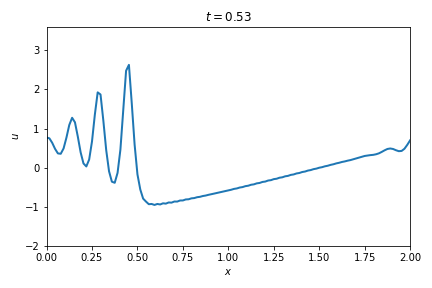

In [21]:
Image(filename='csv/figs/soliton_tsteps50k_xsteps128/frame_025.png')

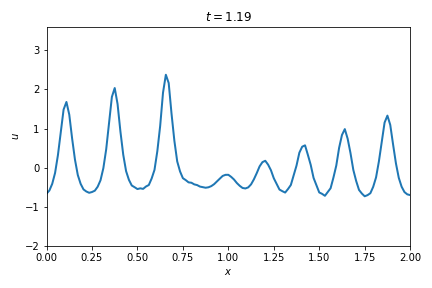

In [22]:
Image(filename='csv/figs/soliton_tsteps50k_xsteps128/frame_056.png')

可见数值解有微小的锯齿。尝试增大步长 $\Delta x$, 即减小 `xsteps`, 我们预期，锯齿（解的不稳定性振荡）将更加严重；结果确实如此：

In [23]:
soliton.solve_with_settings(xsteps=64)
soliton.visualize(gif_gen=gif_gen_soliton)

`gif_gen` is off; using archived GIF. 


$t$ `steps: 50000.0`, $x$ `steps: 64`, 

![](csv/figs/soliton_tsteps50k_xsteps64.gif)

然而，减小 $\Delta x$, 即增大 `xsteps`, 结果却更加糟糕：

In [24]:
soliton.solve_with_settings(xsteps=192)
soliton.visualize(t_sample_size=30, gif_gen=gif_gen_soliton)

PDE blew up! Time evolution terminated.
`gif_gen` is off; using archived GIF. 


$t$ `steps: 50000.0`, $x$ `steps: 192`, 

![](csv/figs/soliton_tsteps50k_xsteps192.gif)

$t \sim 0.65$ 时函数值便溢出了，后续结果失去意义，因此并没有算到最后。程序上，这里采用了 <code class="prettyprint">np.err(all='raise')</code> 并 catch 了 `FloatingPointError` , 以退出循环（`break`）：

In [25]:
pager.extract('KruskalZabusky.pde_solve', tag='catch_overflow')

```
*** Excerpt, tag: <catch_overflow> ```

                # <catch_overflow>
                try:
                    for i, x in enumerate(x_grid):
                        new_u[i] = self._u_generator_default(
                            old_u, i, dt, coef1, coef2,
                            plus1=lambda i: (i + 1) % x_len,
                            plus2=lambda i: (i + 2) % x_len,
                        )  # Automatically ensures periodic boundary.
                except FloatingPointError:
                    print('PDE blew up! Time evolution terminated.')
                    break
                # </catch_overflow>


```
*** Excerpt, tag: <catch_overflow> ```

若无此操作，将可见 <code class="prettyprint">RuntimeWarning: overflow encountered ...</code>

而对于 JIT 编译的 `fast` 版本而言，由于 Numba 不支持 `try ... except ...` 语句，这里设定 `1e300` 作为溢出上限：

In [26]:
pager.extract('KruskalZabusky.pde_solve_fast', tag='catch_overflow')

```
*** Excerpt, tag: <catch_overflow> ```

                        # <catch_overflow>
                        if abs(new_u[i]) > 1e300:  # if overflows:
                            j -= 1  # Remove last t_section
                            print('PDE blew up! Time evolution terminated.')
                            break
                    else:  # only executed if the inner loop did NOT break
                        continue
                    break  # only executed if the inner loop DID break
                    # </catch_overflow>


```
*** Excerpt, tag: <catch_overflow> ```

**为改善数值稳定性，重写格式，对时间采用中心差分：**

In [27]:
from kruskal_zabusky_new import KruskalZabuskyNew, SolitonVisualizeNew
pager.extract('KruskalZabuskyNew.pde_solve_fast', tag='scheme')

```
*** Excerpt, tag: <scheme> ```

                    # <scheme>
                    if j == 1:
                        for i in range(x_len):
                            new_u[i] = u[i] - dt * (
                                (
                                    (u[(i + 1) % x_len] + u[i] + u[i - 1])
                                    * (u[(i + 1) % x_len] - u[i - 1])
                                    / (2 * denominator1)
                                )
                                + deltasq * (
                                    u[(i + 2) % x_len] - 2 * u[(i + 1) % x_len]
                                    + 2 * u[i - 1] - u[i - 2]
                                ) / (2 * denominator2)
                            )
                    else:
                        old_old_u = t_sections[j - 2][1:]
                        for i in range(x_len):
                            new_u[i] = old_old_u[i] - dt * (
                                (
                                    (u[(i + 1) % x_len] + u[i] + u[i 

```
*** Excerpt, tag: <scheme> ```

In [28]:
soliton_new = SolitonVisualizeNew()
soliton_new.solve_with_settings(xsteps=192)
soliton_new.visualize(gif_gen=gif_gen_soliton)

`gif_gen` is off; using archived GIF. 


可见此前爆炸的 `xsteps` $= 192$ 迭代如今不仅稳定了，而且表现完美，不再有明显的不稳定现象。考察此前选定的具体时刻，比较如下：

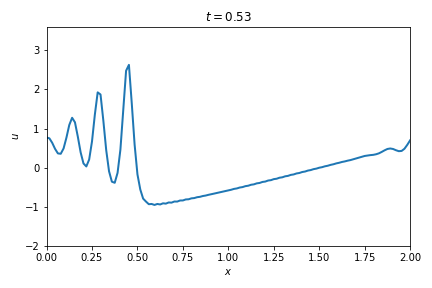

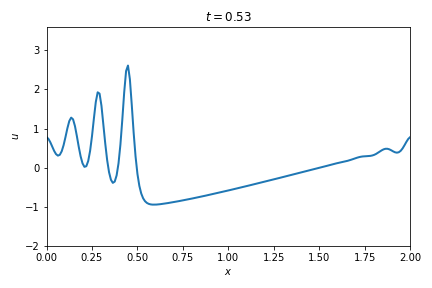

In [29]:
display(Image(filename='csv/figs/soliton_tsteps50k_xsteps128/frame_025.png'))
display(Image(filename='csv/figs/soliton_new_tsteps50k_xsteps192/frame_025.png'))

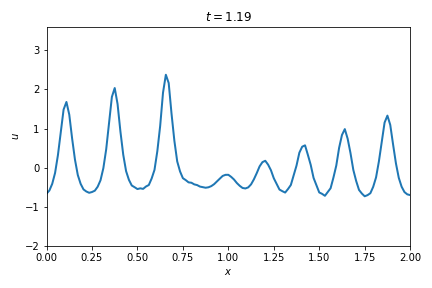

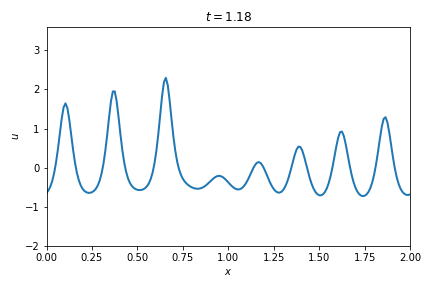

In [30]:
display(Image(filename='csv/figs/soliton_tsteps50k_xsteps128/frame_056.png'))
display(Image(filename='csv/figs/soliton_new_tsteps50k_xsteps192/frame_056.png'))

可见确实有明显的改善。

综上，差分格式对结果有显著影响；对时间成分采用中心差分，再适当增加空间节点，可以显著提升稳定性。

## 补充：进一步考察解的长期行为
##### 中途启动脚本
如未运行前文，需执行以下脚本（实际上和页首初始化单元完全一致），以保证后续正常运行。

In [31]:
try:
    startupOption
except NameError:
    %run -i pycode/soliton_debug_env.py
    gif_gen_soliton = False

大 $t$ 情形下，需要对算法进行一定的内存优化；在此过程中，本人注意到一个严重的问题：pandas DataFrame 的 `set_index()` 实际上会触发复制，导致内存翻倍！故此后不再使用这一 method. 

参考讲义，解的稳定性条件：
$$ \frac{\Delta t}{\Delta x} \pqty{\abs{u} + \frac{4\delta^2}{(\Delta x)^2}} < 1 $$
对大$\Delta x$, 此条件类似于迎风格式的稳定条件 $\frac{\abs{u} \Delta t}{\Delta x} < 1$, 只不过波速为 $\abs{u}$, 这是方程非线性的直接体现；而对小 $\Delta x$, 第二项将占主导，即临界条件：
$$ \frac{4\delta^2\Delta t}{(\Delta x)^3} \sim 1 $$
若求解的时间长度为 `t_span`, 则相应有 $x$ 步数上限：

In [32]:
def xsteps_max(tsteps, t_span):
    x_span = 2.
    return x_span * (tsteps / (t_span * 4 * .022**2))**(1 / 3)

xsteps_max(tsteps=1e5, t_span=.1)

1604.7037887845736

而内存占用量 $\propto$ `xsteps * tsteps` $\propto \pqty{\frac{\texttt{tsteps}^4}{\texttt{t_span}}}^{\frac{1}{3}}$, 同时我们希望时间尺度 $\Delta t = \frac{\texttt{t_span}}{\texttt{tsteps}}$ 尽可能地小，因此增大 `t_span` 是不经济的，实际上应当尽可能减小 `t_span`, 以获得内存、分辨率的双重优化。具体参数如下：

In [33]:
from kruskal_zabusky_new import KruskalZabuskyNew, SolitonVisualizeNew

# Initial run:
t_span = 1.
large_t_sample_size = 20
large_t_params = {
    't_sample_size': large_t_sample_size,
    'gif_gen': False
}

soliton_large_t = SolitonVisualizeNew(t_end=t_span, large_t=True)
soliton_large_t.solve_with_settings(t_max=30., xsteps=160, tsteps=5e5, extend=False)
soliton_large_t.visualize(frame_counter_base=0, **large_t_params)

print(
    '---\n''Memory usage:',
    soliton_large_t.master_df.memory_usage(deep=True).sum() / (1024**2),
    # 'or equally,', soliton_large_t.u_values_list.nbytes / (1024**2),
    'MB\n---'
)

if soliton_large_t.master_df.iloc[-1].isnull().values.any():
    print('PDE already blown up!')

`gif_gen` is off; using archived GIF. 
---
Memory usage: 617.9822692871094 MB
---


考虑到目前计算机标配内存至少为若干 GB, 上述内存占用量其实并不算大。利用已分配的内存空间，对解进行延展（*注意，由于内存回收有一定延迟，瞬时占用量将是上述值的两倍多一些；运行时间大致为 1.5 分钟* ）：

In [34]:
%%timeit -n 1 -r 1

# Please run the previous cell right before this one:
if not soliton_large_t.master_df.iloc[-1].isnull().values.any():
    try:
        for chunk in range(1, int(30. / soliton_large_t.params['t_end'])):
            soliton_large_t.solve_with_settings(extend=True)

            if chunk % 1 == 0:  # Selective plotting
                soliton_large_t.visualize(
                    frame_counter_base=large_t_sample_size * chunk,
                    **large_t_params
                )
                clear_output()
            print('t =', soliton_large_t.master_df.iloc[-1]['t'])

    except (FloatingPointError, KeyboardInterrupt, IndexError, StopIteration):
        os.system("printf '\a'")
else:
    print('PDE already blown up!')
    
soliton_large_t.visualize(
    gif_gen=gif_gen_soliton,
    frame_counter_base=large_t_sample_size * soliton_large_t.ext_counter,
    t_sample_size=large_t_sample_size,
    show=True
)

t = 30.000058000000003
`gif_gen` is off; using archived GIF. 


$t$ `steps: 500000`, $x$ `steps: 160`, 

![](csv/figs/soliton_large_t.gif)

1min 39s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


实验表明，大 $t$ 极限下，前述稳定性条件并没有什么帮助；对于这一问题，直到 `xsteps` 低至 160 左右时才得到稳定解。

**此外，单独采用单步或两步法均难以得到好的结果；其中，单步法锯齿现象（振荡）明显，而两步法往往在最大值处趋向发散。这里的解决方案是，两种格式联合使用，取其中的绝对值较小者；具体如下：**

In [35]:
pager.extract('KruskalZabuskyNew.pde_solve_ext', tag='scheme')

```
*** Excerpt, tag: <scheme> ```

                    # <scheme>
                    for i in range(x_len):

                        # new_u[i] = \
                        one_step = u[i] - dt * (  # noqa: F841
                            (
                                (u[(i + 1) % x_len] + u[i] + u[i - 1])
                                * (u[(i + 1) % x_len] - u[i - 1])
                                / (2 * denominator1)
                            )
                            + deltasq * (
                                u[(i + 2) % x_len] - 2 * u[(i + 1) % x_len]
                                + 2 * u[i - 1] - u[i - 2]
                            ) / (2 * denominator2)
                        )

                        # new_u[i] = \
                        two_step = old_old_u[i] - dt * (  # noqa: F841
                            (
                                (u[(i + 1) % x_len] + u[i] + u[i - 1])
                                * (u[(i + 1) % x_len] - u[i - 1])
                                / denomina

```
*** Excerpt, tag: <scheme> ```

前三个几乎回归（almost recurrence）的时刻（采用 [Kruskal, Zabusky 的记号](https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.15.240)，为 $T_R, 2T_R, 3T_R$）如下：

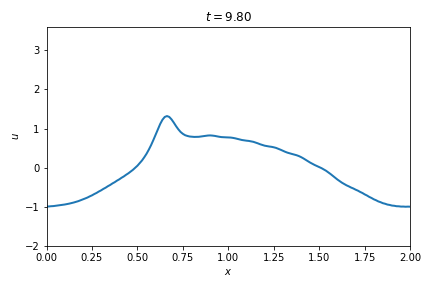

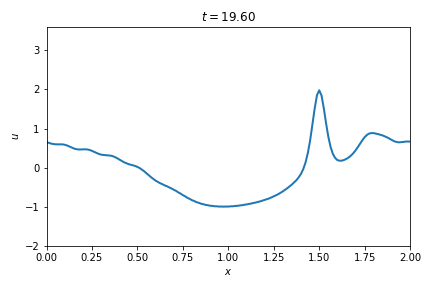

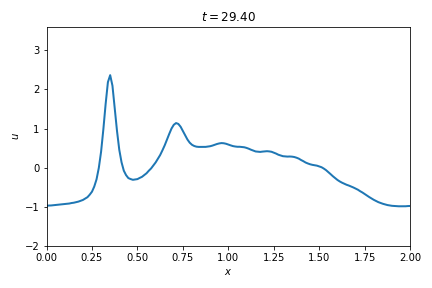

In [36]:
display(Image(filename='csv/figs/soliton_large_t/frame_196.png'))
display(Image(filename='csv/figs/soliton_large_t/frame_392.png'))
display(Image(filename='csv/figs/soliton_large_t/frame_588.png'))

注意，如论文中所述，随时间演化，孤立子之间将会累积相差，导致回归的质量下降，并不能完美地重现初态。因此，这里的 $nT_R$ 实际上是 *准* 周期，而并非严格的周期。

In [37]:
Image(url='csv/figs/soliton_large_t.gif', embed=False)  # Too large to embed

In [39]:
goodbye('ex5')

<IPython.core.display.Javascript object>

[NbConvertApp] Converting notebook ex5.ipynb to html
[NbConvertApp] Converting notebook ex5.ipynb to script
